<a href="https://colab.research.google.com/github/flaviohenriquehb777/TensorFlow-Big-Data/blob/main/Big_Data_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install --upgrade tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np

In [8]:
print('[INFO] accessing MNIST...')
((trainX, trainY), (testX, testY)) = mnist.load_data()

[INFO] accessing MNIST...


In [9]:
trainX = trainX.reshape((trainX.shape[0], 28 * 28 * 1))
testX = testX.reshape((testX.shape[0], 28 * 28 * 1))
trainX = trainX.astype('float32') / 255.0
testX = testX.astype('float32') / 255.0

In [10]:
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [11]:
model = Sequential()
model.add(Dense(256, input_shape=(784,), activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

In [12]:
sgd = SGD(0.01)
model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])
H = model.fit(trainX, trainY, validation_data=(testX, testY),epochs=100, batch_size=128)

Epoch 1/100
469/469 [==============================] - 5s 9ms/step - loss: 2.2789 - accuracy: 0.1973 - val_loss: 2.2350 - val_accuracy: 0.3793
Epoch 2/100
469/469 [==============================] - 5s 10ms/step - loss: 2.2013 - accuracy: 0.4192 - val_loss: 2.1576 - val_accuracy: 0.5315
Epoch 3/100
469/469 [==============================] - 4s 8ms/step - loss: 2.1103 - accuracy: 0.5270 - val_loss: 2.0466 - val_accuracy: 0.6231
Epoch 4/100
469/469 [==============================] - 4s 7ms/step - loss: 1.9775 - accuracy: 0.5849 - val_loss: 1.8848 - val_accuracy: 0.6316
Epoch 5/100
469/469 [==============================] - 4s 8ms/step - loss: 1.7914 - accuracy: 0.6243 - val_loss: 1.6726 - val_accuracy: 0.6564
Epoch 6/100
469/469 [==============================] - 4s 9ms/step - loss: 1.5704 - accuracy: 0.6598 - val_loss: 1.4463 - val_accuracy: 0.6933
Epoch 7/100
469/469 [==============================] - 4s 8ms/step - loss: 1.3575 - accuracy: 0.6987 - val_loss: 1.2495 - val_accuracy: 0.716

In [13]:
predictions = model.predict(testX, batch_size=128)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=[str(x) for x in lb.classes_]))

79/79 [==============================] - 1s 7ms/step
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.97      0.98      0.97      1135
           2       0.93      0.91      0.92      1032
           3       0.91      0.91      0.91      1010
           4       0.92      0.93      0.93       982
           5       0.89      0.87      0.88       892
           6       0.94      0.95      0.94       958
           7       0.94      0.92      0.93      1028
           8       0.90      0.89      0.89       974
           9       0.90      0.91      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000



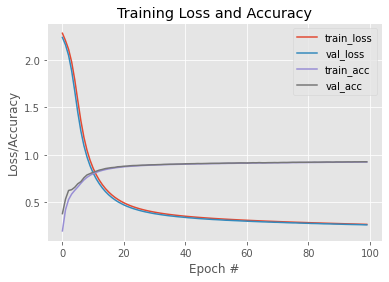

In [15]:
plt.style.use('ggplot')
plt.figure()
plt.plot(np.arange(0, 100), H.history['loss'], label='train_loss')
plt.plot(np.arange(0, 100), H.history['val_loss'], label='val_loss')
plt.plot(np.arange(0, 100), H.history['accuracy'], label='train_acc')
plt.plot(np.arange(0, 100), H.history['val_accuracy'], label='val_acc')
plt.title('Training Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend();